In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm


Load CSV

In [76]:
df = pd.read_csv("product_weights.csv")

 Define parameters 

In [77]:
mu = 100        # Historical population mean
sigma = 2       # Known population std deviation
alpha = 0.05    # Significance level

Extract sample statistics

In [78]:
x_bar = df['weight'].mean()
n = len(df)

Standard Error & Z-Score

In [79]:
se = sigma / math.sqrt(n)
z = (x_bar - mu) / se

P-value & Critical Value

In [80]:
p_value = 2 * (1 - norm.cdf(abs(z)))
z_crit = norm.ppf(1 - alpha/2)

 Visualization

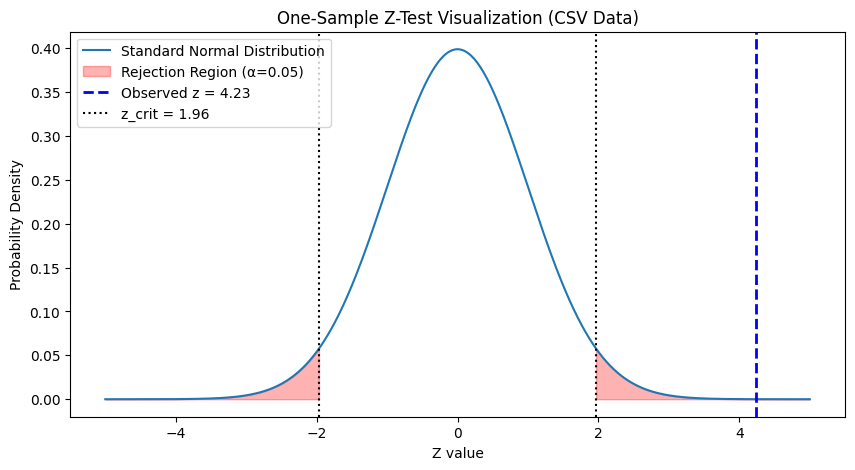

In [81]:
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x)

plt.figure(figsize=(10,5))
plt.plot(x, y, label="Standard Normal Distribution")

# Shade rejection regions
plt.fill_between(x, y, where=(x <= -z_crit), color="red", alpha=0.3, label="Rejection Region (α=0.05)")
plt.fill_between(x, y, where=(x >= z_crit), color="red", alpha=0.3)

# Plot observed z-score
plt.axvline(z, color="blue", linestyle="--", linewidth=2, label=f"Observed z = {z:.2f}")

# Plot critical values
plt.axvline(z_crit, color="black", linestyle=":", label=f"z_crit = {z_crit:.2f}")
plt.axvline(-z_crit, color="black", linestyle=":")

plt.title("One-Sample Z-Test Visualization (CSV Data)")
plt.xlabel("Z value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

Print results 

In [82]:
print(" One-Sample Z-Test from CSV")
print(f"Sample size (n) = {n}")
print(f"Sample mean = {x_bar:.4f}")
print(f"Population mean = {mu}")
print(f"Standard Error = {se:.4f}")
print(f"Z-score = {z:.4f}")
print(f"Critical value (±) = {z_crit:.4f}")
print(f"P-value = {p_value:.8f}")

if p_value < alpha:
    print("\n Reject H₀ → The new machine significantly changes product weight.")
else:
    print("\n Fail to Reject H₀ → No significant difference in product weight.")

 One-Sample Z-Test from CSV
Sample size (n) = 300
Sample mean = 100.4887
Population mean = 100
Standard Error = 0.1155
Z-score = 4.2326
Critical value (±) = 1.9600
P-value = 0.00002311

 Reject H₀ → The new machine significantly changes product weight.
